In [64]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io,color
import cv2 as cv

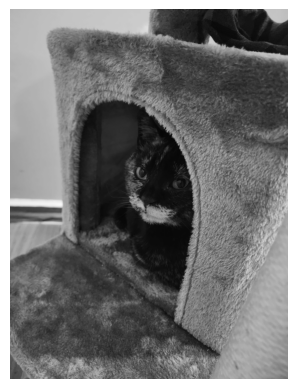

In [65]:
# Open image as grayscale
#cv.COLOR_BGR2RGB
img = io.imread('catTemp.jpg', as_gray=True)
imgcv = cv.imread('catTemp.jpg')
imgcv = cv.cvtColor(imgcv,cv.COLOR_BGR2GRAY)
imgcv = cv.cvtColor(imgcv,cv.COLOR_BGR2RGB)
# Show image
plt.imshow(imgcv)
plt.axis('off')

plt.show()

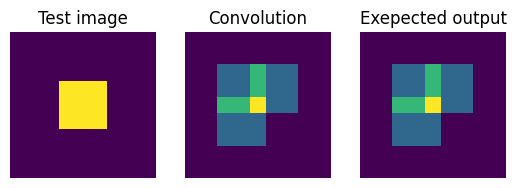

In [66]:
from filters import conv_nested

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

In [67]:
from filters import conv_nested

# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,1,1],
    [1,-1,1],
    [1,1,1]
])

kernel2 = np.array(
[
    [0,-1,0],
    [-1,1,-1],
    [0,-1,0]
])
#print(imgconv.shape,img.shape)
out = conv_nested(img, kernel)
out2 = conv_nested(img, kernel2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


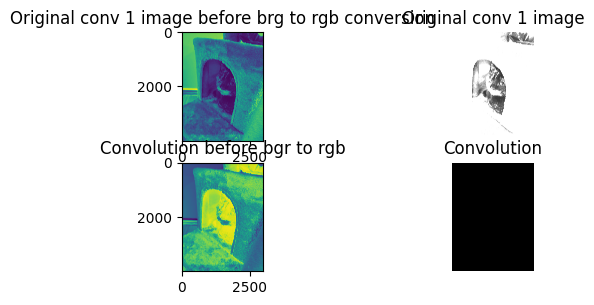

In [68]:


# Plot original image
plt.subplot(3,2,1)
plt.imshow(out)
plt.title('Original conv 1 image before brg to rgb conversion')

imgOrigToShow = color.gray2rgb(out)

plt.subplot(3,2,2)
plt.imshow(imgOrigToShow)
plt.title('Original conv 1 image')
plt.axis('off')

# Plot your convolved image
plt.subplot(3,2,3)
plt.imshow(out2)
plt.title('Convolution before bgr to rgb')

Out2imgOrigToShow = color.gray2rgb(out2)

plt.subplot(3,2,4)
plt.imshow(Out2imgOrigToShow)
plt.title('Convolution')
plt.axis('off')

'''# Plot what you should get
#solution_img = io.imread('catTemp.jpg', as_gray=True)
plt.subplot(2,3,5)
plt.title('Convolution before bgr to rgb')

Out2imgOrigToShow = color.gray2rgb(img)
plt.subplot(2,3,6)

plt.imshow(Out2imgOrigToShow)
plt.title('Convolution matrix 2')
plt.axis('off')'''

plt.show()

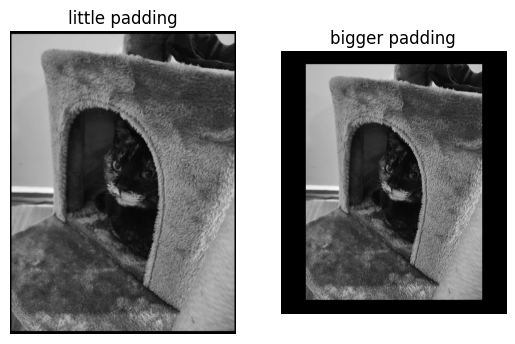

In [69]:
from filters import zero_pad

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)
padded_img2 = zero_pad(img, pad_height+200, pad_width+400)
padded_img = color.gray2rgb(padded_img)
padded_img2 = color.gray2rgb(padded_img2)
# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('little padding')
plt.axis('off')

# Plot what you should get
#solution_img = io.imread('padded_dog.jpg', as_grey=True)
plt.subplot(1,2,2)
plt.imshow(padded_img2)
plt.title('bigger padding')
plt.axis('off')

plt.show()

conv_nested: took 102.991500 seconds.
conv_fast: took 68.319816 seconds.


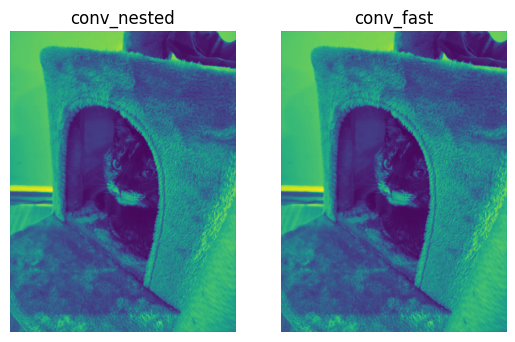

In [70]:
from filters import conv_fast

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

conv_fast: took 66.634277 seconds.
conv_faster: took 0.333000 seconds.


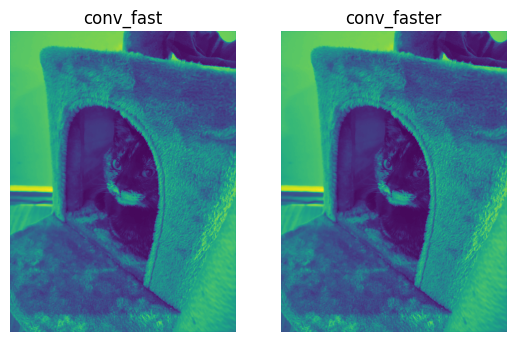

In [71]:
from filters import conv_faster

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_faster = conv_faster(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_fast: took %f seconds." % (t1 - t0))
print("conv_faster: took %f seconds." % (t2 - t1))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_faster)
plt.title('conv_faster')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_faster) < 1e-10):
    print("Different outputs! Check your implementation.")